In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, FunctionTransformer
from sklearn.metrics import r2_score, mean_squared_error, make_scorer
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
list(zip(letters,numbers))

[('a', 1), ('t', 2), ('t', 3), ('o', 4), ('y', 5), (2, 6)]

In [6]:
letters = ['a',"t",'t','o','y',2,5,'o','g','nope','6.5',np.nan,'t','a']
numbers = [1,2,3,4,5,6]

def func_name(list_letter,list_number):
    word = ''
    sum_num = 0
    for letter,number in zip(list_letter,list_number):
        if isinstance(letter,str) and number % 2 == 0:
            word += letter
            sum_num += number

    return word, sum_num

In [7]:
func_name(letters,numbers)

('to', 6)

In [8]:
tips = pd.read_csv('data/tips.csv')


In [9]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [10]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
tips.loc[0:6:2,['tip','day']]

,tip,day
0,1.01,Sun
2,3.50,Sun
4,3.61,Sun
6,2.00,Sun


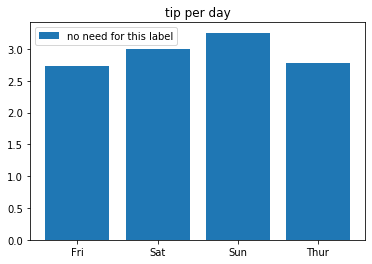

In [12]:
gender_grouped = tips.groupby('day',as_index=False)['tip'].mean()
plt.bar(gender_grouped.day,gender_grouped.tip,label = 'no need for this label')
plt.title('tip per day')
plt.legend()

In [13]:
kf = KFold(shuffle=True, random_state=72018, n_splits=5)

In [15]:
#What does this output?
for first_output, second_output in kf.split(tips):
    print(first_output[:5],second_output[:5])

[1 2 4 5 7] [ 0  3  6 19 25]
[0 1 2 3 5] [ 4 15 16 17 26]
[0 2 3 4 6] [ 1  5  8  9 11]
[0 1 2 3 4] [13 14 18 21 24]
[0 1 3 4 5] [ 2  7 10 12 20]


In [16]:
tips.skew()

total_bill    1.133213
tip           1.465451
size          1.447882
dtype: float64

In [17]:
tips = tips.select_dtypes('number')

In [18]:
X = tips.drop('tip',axis=1)
y = tips.tip

In [26]:
#How do I create a pipeline with 

pf = PolynomialFeatures(include_bias=False,)
las = Lasso(max_iter = 1000)


est = Pipeline([('pf',pf),('las',las)])

In [27]:
est.fit(X,y);

In [28]:
est['las'].coef_

array([0.        , 0.        , 0.00134259, 0.00760846, 0.        ])

In [29]:
est['pf'].get_feature_names()

['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [30]:
mean_squared_error(y,est.predict(X))

1.0481961112751363

In [31]:
#creating some scoring functions
def score_func(y,y_pred):
    error_4 = (y-y_pred)**4
    total = error_4.sum()
    return -total

quatro = make_scorer(score_func)

def scorer_2(mod,X,y):
    mod.fit(X,y)
    pred = mod.predict(X)
    error = y - pred
    penalize_positive = np.where(error>0,error*2,abs(error))
    return -penalize_positive.sum()

In [32]:
# How do I fill in parameters
params = {'pf__degree':[1,2,3,4],'las__alpha':[0.001,0.01,0.1,1]}
grid = GridSearchCV(est,params,cv = kf,scoring=scorer_2)

In [35]:
grid.fit(X,y);

In [36]:
mean_squared_error(y,grid.predict(X))

0.9102172832742759

In [37]:
grid.best_params_

{'las__alpha': 0.001, 'pf__degree': 4}

In [38]:
grid.best_estimator_['las'].coef_

array([ 2.07008604e-01, -6.99483792e-02, -8.20878376e-03,  7.66890870e-02,
       -2.48874851e-01, -1.15630120e-04,  1.48179264e-03, -2.71237754e-03,
       -1.21831841e-02,  3.43623530e-06, -1.08754541e-05, -1.76691617e-04,
       -5.85396150e-04,  8.36254494e-03])

In [39]:
grid.best_score_

-44.79491839372402